**TODO**
- Sentiment analysis column
- Try out some models 

If all do bad go to next step and try word2vec:
- Word2Vec possibly on text column

In [2]:
def prep_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=.9)
    normalizer = preprocessing.Normalizer()
    norm_train_X = normalizer.fit_transform(X_train)
    norm_test_X = normalizer.fit_transform(X_test)
    return norm_train_X, norm_test_X, y_train, y_test

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys
import nltk
from matplotlib.pyplot import figure
from sklearn import preprocessing




# makes plots nice
def make_pretty(ax, title='', x_label='', y_label='', img=False):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    if img:
        ax.axis('off')
    return ax

pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)


data_path = os.path.join('nice_combined_data.csv')

In [3]:
df = pd.read_csv(data_path)

In [4]:
df['target'] = df['target'].apply(lambda x : 1 if x > 0 else 0)
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
print(df.shape)
df.head()

(6574, 10)


,Date,mentioned,text,mentioned_count,upvote_ratio,score,gilded,total_awards_received,num_comments,target
0,2021-01-04,AAPL,weekend iv report ticker low iv cheap premium ...,18,0.771111,163.500000,0.333333,4.166667,79.277778,0
1,2021-01-04,AMC,crazy buy amc right thinking going long amc lo...,1,0.440000,0.000000,0.000000,0.000000,18.000000,0
2,2021-01-04,BA,weekend iv report ticker low iv cheap premium ...,7,0.765714,97.428571,0.000000,0.428571,37.142857,0
3,2021-01-04,BABA,weekend iv report ticker low iv cheap premium ...,9,0.737778,58.111111,0.000000,0.222222,31.777778,1
4,2021-01-04,BB,guess company due diligence without revealing ...,1,0.960000,417.000000,1.000000,2.000000,51.000000,0


In [6]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')


analyzer = SentimentIntensityAnalyzer()

try:
    df = pd.read_pickle('sent_df')
except:
    df['polarity'] = df['text'].apply(lambda x : analyzer.polarity_scores(x))
    df['neg'] = [x['neg'] for x in df['polarity']]
    df['neu'] = [x['neu'] for x in df['polarity']]
    df['pos'] = [x['pos'] for x in df['polarity']]
    df = df.drop(columns=['polarity'])
    df.head()
    df.to_pickle('sent_df')



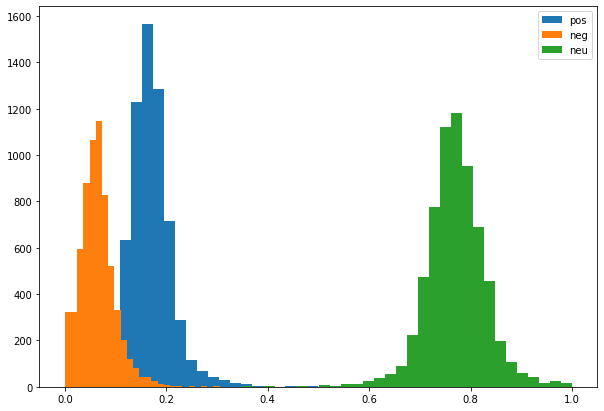

In [8]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.hist(df['pos'], bins=30, label='pos')
plt.hist(df['neg'], bins=30, label='neg')
plt.hist(df['neu'], bins=30, label='neu')
plt.legend()
plt.show()

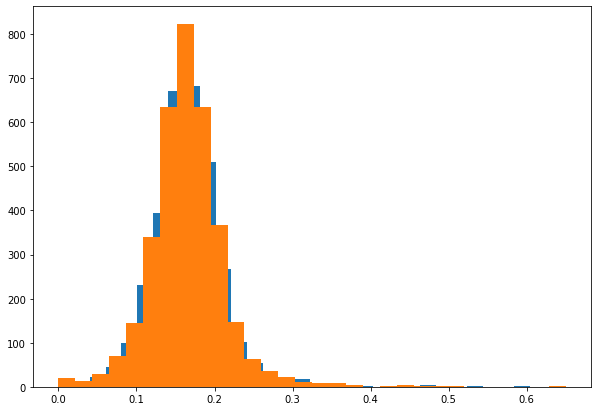

In [9]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.hist(df['pos'][df['target'] == 1], bins=30)
plt.hist(df['pos'][df['target'] == 0], bins=30)
plt.show()

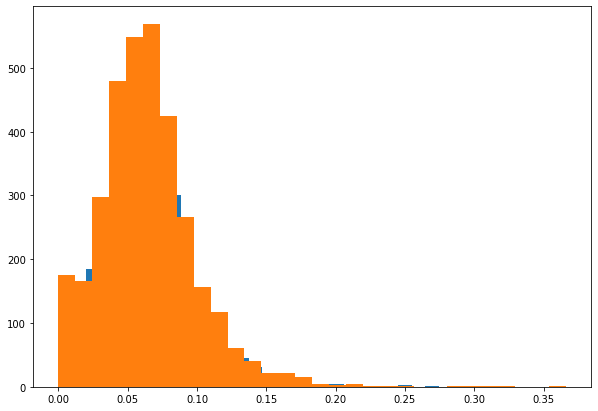

In [10]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.hist(df['neg'][df['target'] == 1], bins=30)
plt.hist(df['neg'][df['target'] == 0], bins=30)
plt.show()

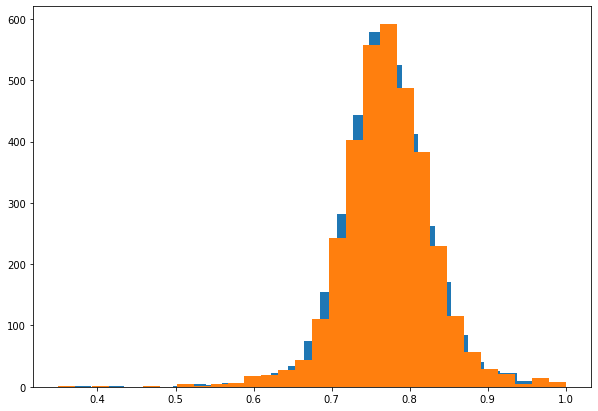

In [11]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.hist(df['neu'][df['target'] == 1], bins=30)
plt.hist(df['neu'][df['target'] == 0], bins=30)
plt.show()

### Okay so it looks like there is nothing realling telling about the sentament no its own. Lets try to augment it by how much people agree with this by using the metrics we have on the post

In [12]:
augmented_df = df.copy()

In [13]:
augmented_df['neg'] = augmented_df['upvote_ratio'] * augmented_df['neg']
augmented_df['pos'] = augmented_df['upvote_ratio'] * augmented_df['pos']
augmented_df['neu'] = augmented_df['upvote_ratio'] * augmented_df['neu']

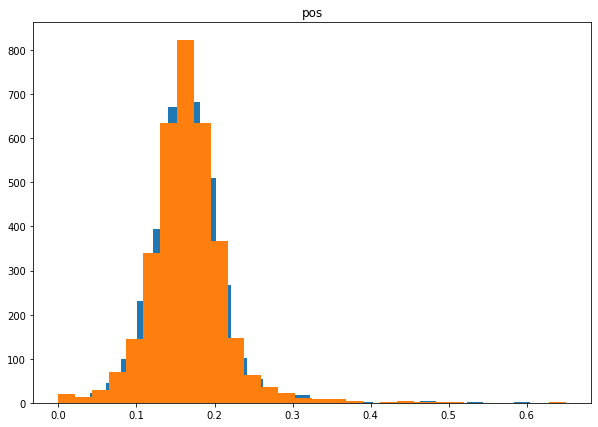

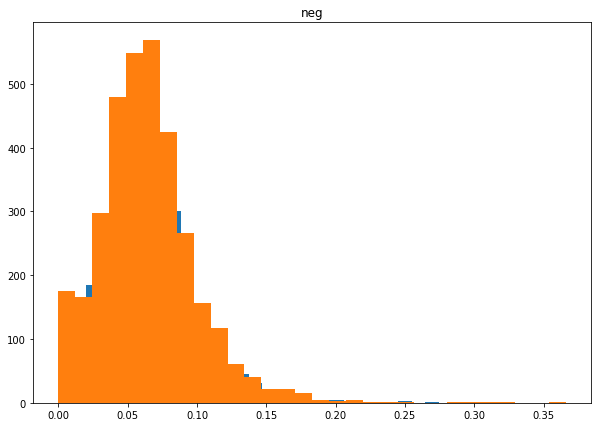

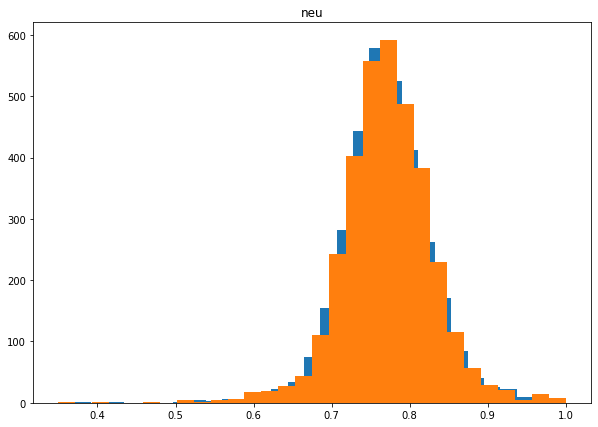

In [14]:
for c in ['pos', 'neg', 'neu']:
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(7)
    plt.hist(df[c][df['target'] == 1], bins=30)
    plt.hist(df[c][df['target'] == 0], bins=30)
    plt.title(c)
    plt.show()
# noot good yet

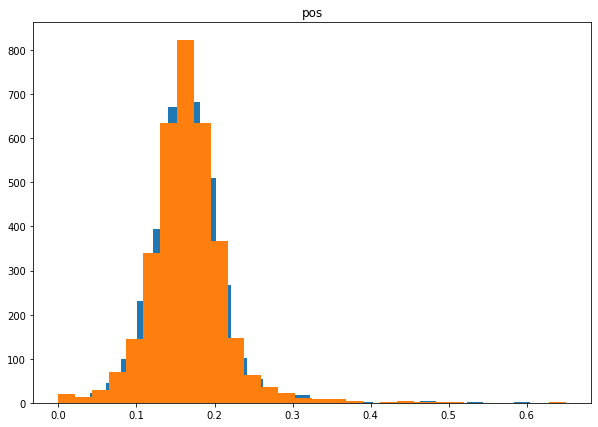

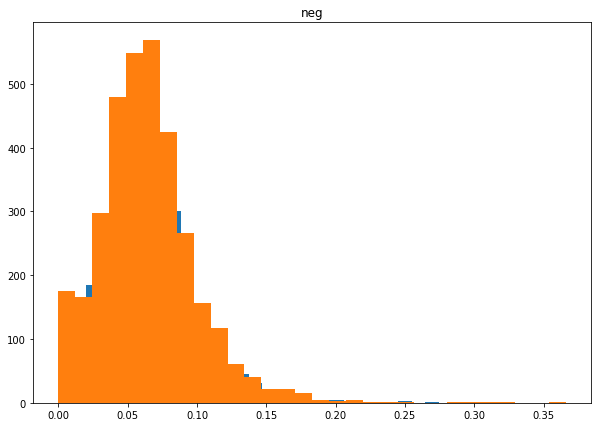

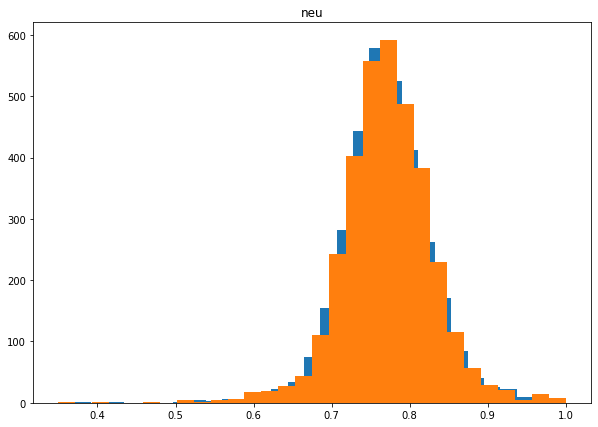

In [15]:
augmented_df['neg'] = augmented_df['score'] * augmented_df['neg']
augmented_df['pos'] = augmented_df['score'] * augmented_df['pos']
augmented_df['neu'] = augmented_df['score'] * augmented_df['neu']
for c in ['pos', 'neg', 'neu']:
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(7)
    plt.hist(df[c][df['target'] == 1], bins=30)
    plt.hist(df[c][df['target'] == 0], bins=30)
    plt.title(c)
    plt.show()
# darn

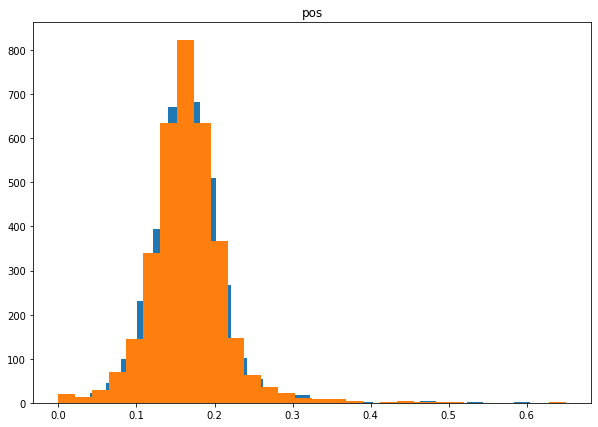

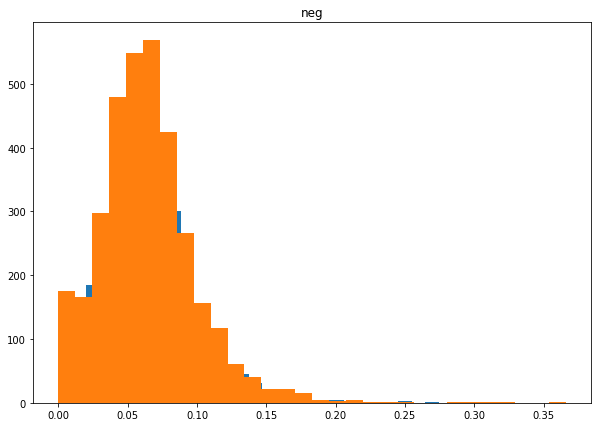

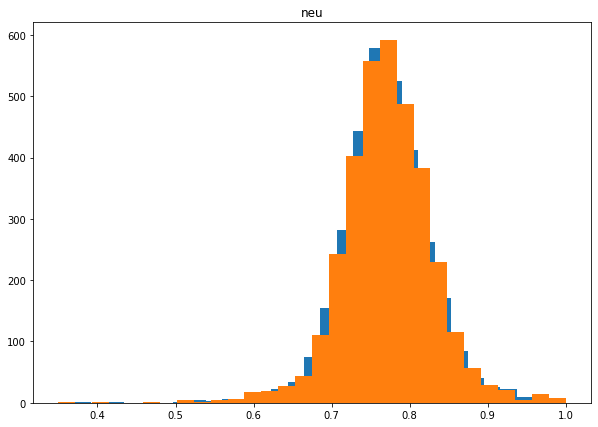

In [16]:
augmented_df['neg'] = augmented_df['total_awards_received'] * augmented_df['neg']
augmented_df['pos'] = augmented_df['total_awards_received'] * augmented_df['pos']
augmented_df['neu'] = augmented_df['total_awards_received'] * augmented_df['neu']
for c in ['pos', 'neg', 'neu']:
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(7)
    plt.hist(df[c][df['target'] == 1], bins=30)
    plt.hist(df[c][df['target'] == 0], bins=30)
    plt.title(c)
    plt.show()
# hmmm...

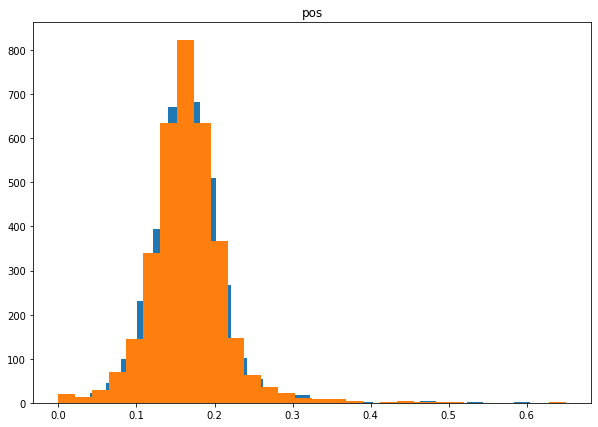

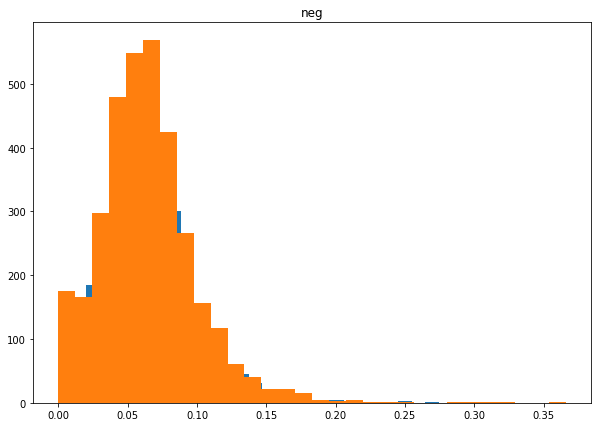

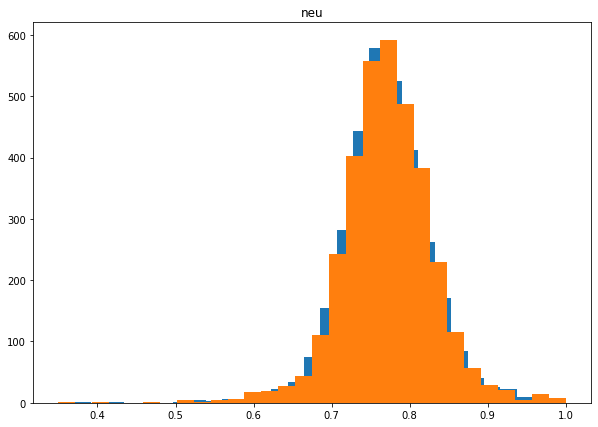

In [17]:
augmented_df['neg'] = augmented_df['num_comments'] * augmented_df['neg']
augmented_df['pos'] = augmented_df['num_comments'] * augmented_df['pos']
augmented_df['neu'] = augmented_df['num_comments'] * augmented_df['neu']
for c in ['pos', 'neg', 'neu']:
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(7)
    plt.hist(df[c][df['target'] == 1], bins=30)
    plt.hist(df[c][df['target'] == 0], bins=30)
    plt.title(c)
    plt.show()
# yikes

In [18]:
try_two = df.copy()

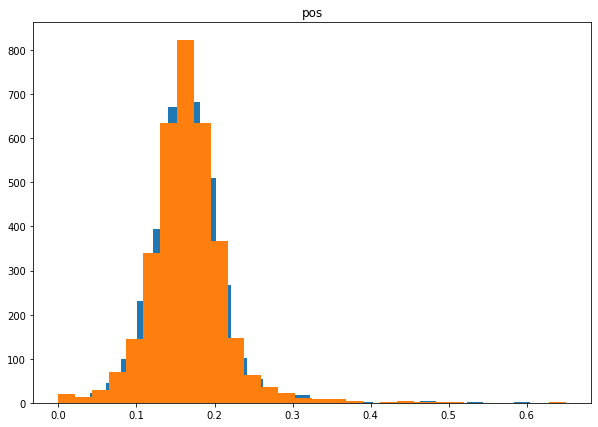

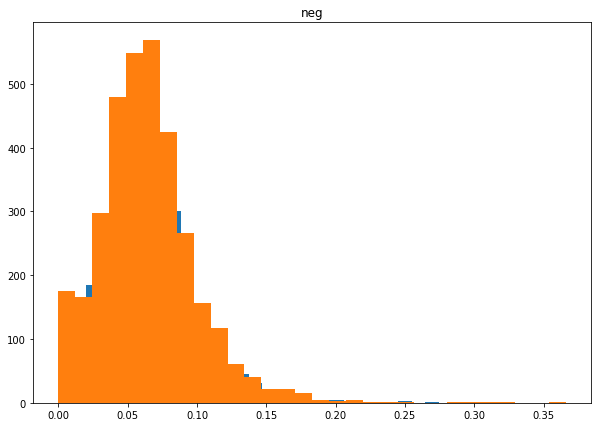

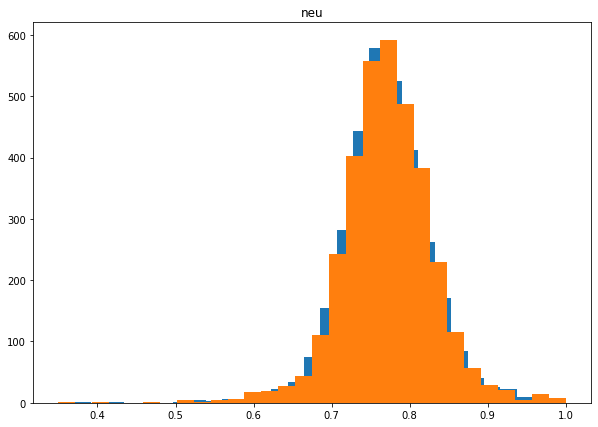

In [19]:
try_two['neg'] = try_two['num_comments'] * try_two['neg']
try_two['pos'] = try_two['num_comments'] * try_two['pos']
try_two['neu'] = try_two['num_comments'] * try_two['neu']
for c in ['pos', 'neg', 'neu']:
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(7)
    plt.hist(df[c][df['target'] == 1], bins=30)
    plt.hist(df[c][df['target'] == 0], bins=30)
    plt.title(c)
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# lets throw some random stuff at it and see what happens
# no text included, all unique values so no need, and metioned for now
X = df[['mentioned_count','upvote_ratio','score','gilded','total_awards_received','num_comments', 'neg','neu','pos']].to_numpy()
y = df['target'].to_numpy()

In [22]:
X_train, X_test, y_train, y_test = prep_data(X, y)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_percentage_error, accuracy_score

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'RF: {acc}')
# RF: 0.5106382978723404


KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'LR: {acc}')
# LR: 0.513677811550152


LR: 0.513677811550152


In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=1)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'SVM: {acc}')
# SVM: 0.5197568389057751


SVM: 0.5197568389057751


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'KNN: {acc}')
# KNN: 0.4817629179331307


KNN: 0.4817629179331307


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'GNB: {acc}')
# GNB: 0.4817629179331307


GNB: 0.4817629179331307


In [31]:
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.optimizers import Adam, SGD, RMSprop
import keras

# I know this is way too big, tried lots of network archs, with and without dropout, diffrent optimizers, learning rates, callbacks, all no good
model = Sequential(
    [
        Dense(9, activation='relu'),
        Dense(2048, activation='relu'),
        Dropout(.3),
        Dense(1024, activation='relu'),
        Dropout(.3),
        Dense(512, activation='relu'),
        Dropout(.3),
        Dense(256, activation='relu'),
        Dropout(.3),
        Dense(128, activation='relu'),
        Dropout(.3),
        Dense(64, activation='relu'),
        Dropout(.3),
        Dense(32, activation='relu'),
        Dropout(.3),
        Dense(16, activation='relu'),
        Dropout(.3),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(2, activation='relu'),
        Dense(1, activation = 'softmax'),
    ]
)

optimizer = RMSprop(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

call=[
    keras.callbacks.EarlyStopping(monitor='accuracy',patience=10),
    keras.callbacks.ModelCheckpoint(
    filepath='pred_model.h5',
    monitor='val_loss',
    save_best_only=True),
    keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 5)
   ]

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=64,epochs=100, callbacks=call)

Epoch 1/100
93/93 [==============================] - 6s 47ms/step - loss: 0.6931 - accuracy: 0.4870 - val_loss: 0.6929 - val_accuracy: 0.4757 - lr: 1.0000e-04
Epoch 2/100
88/93 [===========================>..] - ETA: 0s - loss: 0.6931 - accuracy: 0.4890

KeyboardInterrupt: 

In [ ]:
pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'NN: {acc}')
# NN: 0.47720364741641336
# # 

21/21 [==============================] - 0s 3ms/step
NN: 0.47720364741641336


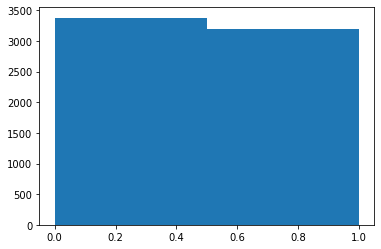

In [ ]:
# is this even balenced?
plt.hist(df['target'], bins=2)
plt.show()
# dang it is, thats not the issue

In [ ]:
# okay lets go to Word2vec and see what we got...

In [ ]:
# from gensim.models import Word2Vec, FastText

In [ ]:
# listy_sent = [sent.split(' ') for sent in df['text']]

In [ ]:
# vec = Word2Vec(listy_sent, min_count=1)
## takes like 1 min
# print(vec)

Word2Vec<vocab=355640, vector_size=100, alpha=0.025>


In [ ]:
# vec.wv.most_similar('short')

In [ ]:
# bag of words?

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [25]:
vectorizer = CountVectorizer()
ret = vectorizer.fit_transform(df['text'])

In [ ]:
df_hd = pd.DataFrame(ret.toarray(),columns=vectorizer.get_feature_names_out())
df_hd.head()

,00,000,0000,00000,000000,00000000,000000000,000000000000000000001,000000000042069,0000000001,000000001,00000001,00000001002hkdhkd,00000001sthen,000000020041,000000040052,000000050000002,00000005011krwkrw,0000001,000000110595,0000001tldr,0000002,0000002600000014,0000002900000015,000000400000022,0000005901233,0000006735,000000s,000001,0000010,0000010000,0000011,0000012,00000123,0000012312017,0000012312018,0000012312019,0000012500000069,00000127,0000013,0000014,0000015,0000016,0000017,0000018,0000019,000001s,000002,0000020,0000021,0000022,00000227short,0000023,0000024,0000025,00000253,0000026,0000027,0000028,0000029,000002patrick,000003,0000030,0000031,0000032,0000033,0000034,0000035,0000036,0000037,0000038,0000039,000004,0000040,0000040050062,0000041,00000418391235,0000042,0000043,0000044,0000045,0000046,00000467short,0000047,0000048,0000049,000005,0000050,0000050000entertainment6,0000050000food,0000050000healthcare6,000005000when,000005104,0000058333grand,0000059,000006,00000689,0000069,000007,000007wsb,000008,000009,00000balance,00000car,00000cash,00000deposit,00000difference,00000dq191,00000eureur,00000february,00000fi,00000food,00000fslrfirst,00000grand,00000health,00000hkd721,00000ipoddebit,00000noknok,00000nzd4,00000retirement,00000sep201416,00000snprcovered,00000usd,00000we,00000wonder,...,zoster,zotac,zotye,zpod,zprv,zprx,zrich,zsan,zsan_ah,zsanheres,zsans,zscaler,zscaler925284573,zscalercrowdstrike,zscestrian,zscore,zshare,zt,ztable,zte,ztein,zti,ztipst,ztipstvanguard,ztis,ztna,zto,zts,ztszoetis,ztz99,zu,zuboff,zucchini,zuccotti,zuck,zucked,zuckenberg,zuckerberg,zuckerbergcecilia,zuckerbergs,zuckerbot,zuckerburg,zuckerverse,zucks,zuclomiphene,zudem,zuffa,zufllige,zug,zuiderdam,zuk,zukaufen,zuletzt,zulily,zulilychief,zulilys,zulilyso,zulilyvp,zullen,zulresso,zult,zulu,zum,zuma,zuma19,zumba,zumiez,zumz,zunami,zune,zunxiang,zunxiangexclusive,zuo,zuoquan,zuoquanfebruary,zuora,zuoras,zuoratodays,zur,zuranolone,zurich,zurichbased,zurichdigital,zusammenwe,zusatzkosten,zustndige,zuvor,zuwie,zvi,zvia,zvo,zvv,zwang,zwar,zwc,zwei,zweig,zweigchoose,zweigdimenna,zweigif,zweigmany,zwitsal,zx200bi,zx4,zx5,zy,zydus,zyesami,zyesamivip,zyesamivipaviptadil,zylo,zymergen,zyne,zyng,zynga,zyngathanks,zynteglo,zyx,zz,zzz,zzzmy,zzzwhats,zzzzzs,zzzzzzzzzzzassumes,zzzzzzzzzzzzzzzzzzgo
0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [26]:
trunk = TruncatedSVD(n_components=10)
reduc = trunk.fit_transform(ret)

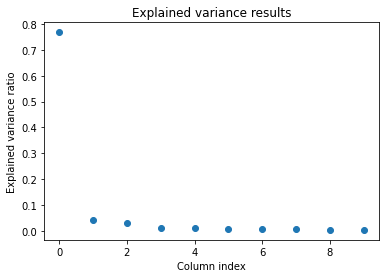

In [ ]:
plt.scatter(list(range(10)), trunk.explained_variance_ratio_)
plt.title('Explained variance results')
plt.xlabel('Column index')
plt.ylabel('Explained variance ratio')
plt.show()

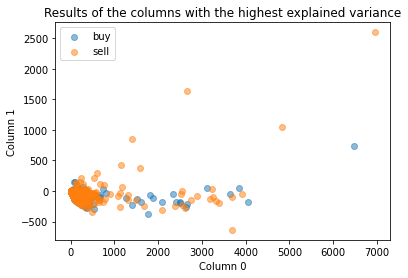

In [ ]:
plt.scatter(reduc[:, 0][df['target'] == 1], reduc[:, 1][df['target'] == 1], alpha = .5)
plt.scatter(reduc[:, 0][df['target'] == 0], reduc[:, 1][df['target'] == 0], alpha = .5)
plt.title('Results of the columns with the highest explained variance')
plt.xlabel('Column 0')
plt.ylabel('Column 1')
plt.legend(['buy', 'sell'])
plt.show()

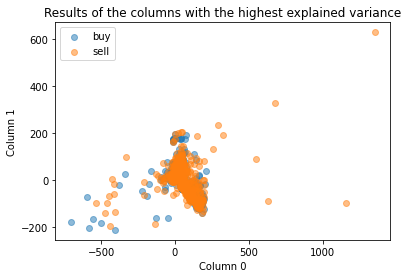

In [ ]:
plt.scatter(reduc[:, 2][df['target'] == 1], reduc[:, 3][df['target'] == 1], alpha = .5)
plt.scatter(reduc[:, 2][df['target'] == 0], reduc[:, 3][df['target'] == 0], alpha = .5)
plt.xlabel('Column 2')
plt.ylabel('Column 3')
plt.legend(['buy', 'sell'])
plt.show()
# I see potentain in this one, there is a huge shared area, but the right side has only sells

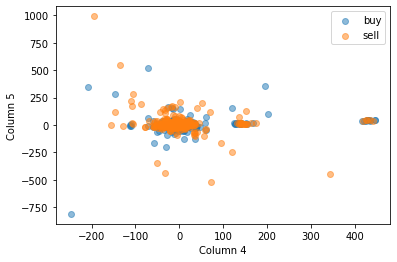

In [ ]:
plt.scatter(reduc[:, 4][df['target'] == 1], reduc[:, 5][df['target'] == 1], alpha = .5)
plt.scatter(reduc[:, 4][df['target'] == 0], reduc[:, 5][df['target'] == 0], alpha = .5)
plt.xlabel('Column 4')
plt.ylabel('Column 5')
plt.legend(['buy', 'sell'])
plt.show()

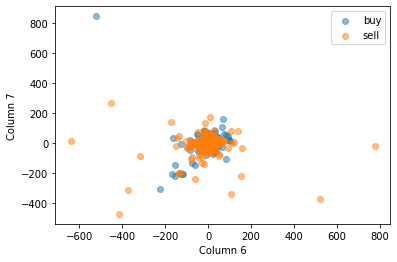

In [ ]:
plt.scatter(reduc[:, 6][df['target'] == 1], reduc[:, 7][df['target'] == 1], alpha = .5)
plt.scatter(reduc[:, 6][df['target'] == 0], reduc[:, 7][df['target'] == 0], alpha = .5)
plt.xlabel('Column 6')
plt.ylabel('Column 7')
plt.legend(['buy', 'sell'])
plt.show()

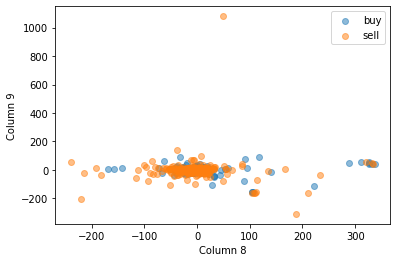

In [ ]:
plt.scatter(reduc[:, 8][df['target'] == 1], reduc[:, 9][df['target'] == 1], alpha = .5)
plt.scatter(reduc[:, 8][df['target'] == 0], reduc[:, 9][df['target'] == 0], alpha = .5)
plt.xlabel('Column 8')
plt.ylabel('Column 9')
plt.legend(['buy', 'sell'])
plt.show()

In [ ]:
reduc.shape

(6574, 10)

In [ ]:
# now, lets re run the models from above with this input

In [ ]:
X_train, X_test, y_train, y_test = prep_data(reduc, y)

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'RF: {acc}')

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'LR: {acc}')

svc = SVC(random_state=1)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'SVM: {acc}')

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'KNN: {acc}')

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'GNB: {acc}')
# RF: 0.5167173252279635
# LR: 0.506079027355623
# SVM: 0.4817629179331307
# KNN: 0.48632218844984804
# GNB: 0.513677811550152

RF: 0.5167173252279635
LR: 0.506079027355623
SVM: 0.4817629179331307
KNN: 0.48632218844984804
GNB: 0.513677811550152


In [ ]:
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.optimizers import Adam, SGD, RMSprop
import keras

# I know this is way too big, tried lots of network archs, with and without dropout, diffrent optimizers, learning rates, callbacks, all no good
model = Sequential(
    [
        Dense(10, activation='relu'),
        # Dense(2048, activation='relu'),
        # Dropout(.3),
        # Dense(1024, activation='relu'),
        # Dropout(.3),
        # Dense(512, activation='relu'),
        # Dropout(.3),
        # Dense(256, activation='relu'),
        # Dropout(.3),
        # Dense(128, activation='relu'),
        # Dropout(.3),
        Dense(64, activation='relu'),
        Dropout(.3),
        Dense(32, activation='relu'),
        Dropout(.3),
        Dense(16, activation='relu'),
        Dropout(.3),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(2, activation='relu'),
        Dense(1, activation = 'softmax'),
    ]
)

optimizer = RMSprop(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

call=[
    keras.callbacks.EarlyStopping(monitor='accuracy',patience=10),
    keras.callbacks.ModelCheckpoint(
    filepath='pred_model.h5',
    monitor='val_loss',
    save_best_only=True),
    keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 5)
   ]

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=64,epochs=100, callbacks=call)

Epoch 1/100
93/93 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.4828 - val_loss: 0.6932 - val_accuracy: 0.5137 - lr: 1.0000e-04
Epoch 2/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4828 - val_loss: 0.6933 - val_accuracy: 0.5137 - lr: 1.0000e-04
Epoch 3/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4828 - val_loss: 0.6933 - val_accuracy: 0.5137 - lr: 1.0000e-04
Epoch 4/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4828 - val_loss: 0.6933 - val_accuracy: 0.5137 - lr: 1.0000e-04
Epoch 5/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.4828 - val_loss: 0.6934 - val_accuracy: 0.5137 - lr: 1.0000e-04
Epoch 6/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.4828 - val_loss: 0.6934 - val_accuracy: 0.5137 - lr: 1.0000e-04
Epoch 7/100
93/93 [==============================] -

In [ ]:
pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'NN: {acc}')
# NN: 0.513677811550152


21/21 [==============================] - 0s 543us/step
NN: 0.513677811550152


In [ ]:
# lets try it all with all the data

In [ ]:
ret.shape

(6574, 355604)

In [27]:
X_train, X_test, y_train, y_test = prep_data(ret, y)

In [ ]:

want_to_wait_for_lots_of_time_for_models_to_run = False

if want_to_wait_for_lots_of_time_for_models_to_run:
    rf = RandomForestClassifier(n_estimators = 1000, max_depth=3, random_state = 1)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(f'RF: {acc}')

    lr = LogisticRegression(random_state=1, max_iter=1000)
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(f'LR: {acc}')

    svc = SVC(random_state=1)
    svc.fit(X_train, y_train)
    pred = svc.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(f'SVM: {acc}')

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(f'KNN: {acc}')

    # gnb = GaussianNB()
    # gnb.fit(X_train.toarray(), y_train)
    # pred = gnb.predict(X_test.toarray())
    # acc = accuracy_score(pred, y_test)
    # print(f'GNB: {acc}')
# RF: 0.47416413373860183
# LR: 0.5334346504559271
# SVM: 0.5349544072948328
# KNN: 0.5334346504559271

RF: 0.47416413373860183
LR: 0.5334346504559271
SVM: 0.5349544072948328
KNN: 0.5334346504559271


In [32]:
# I know this is way too big, tried lots of network archs, with and without dropout, diffrent optimizers, learning rates, callbacks, all no good
model = Sequential(
    [
        # Dense(355604, activation='relu'),
        # Dense(355604/2, activation='relu'),
        # Dropout(.3),
        # Dense(355604/4, activation='relu'),
        # Dropout(.3),
        Dense(2048, activation='relu'),
        Dropout(.3),
        Dense(1024, activation='relu'),
        Dropout(.3),
        Dense(512, activation='relu'),
        Dropout(.3),
        Dense(256, activation='relu'),
        Dropout(.3),
        Dense(128, activation='relu'),
        Dropout(.3),
        Dense(64, activation='relu'),
        Dropout(.3),
        Dense(32, activation='relu'),
        Dropout(.3),
        Dense(16, activation='relu'),
        Dropout(.3),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(2, activation='relu'),
        Dense(1, activation = 'softmax'),
    ]
)

optimizer = RMSprop(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

call=[
    keras.callbacks.EarlyStopping(monitor='accuracy',patience=10),
    keras.callbacks.ModelCheckpoint(
    filepath='pred_model.h5',
    monitor='val_loss',
    save_best_only=True),
    keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 5)
   ]

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=64,epochs=100, callbacks=call)

Epoch 1/100


In [7]:
df['target'].sum()/len(df['target'])

0.48585336172801946

# Conclusion: Best model is SVM with BOW, Random guess is .49, SVM is .535